# Finding the Two Best Markets to Advertise in an E-learning Product

In this project, we'll aim to find the two best markets to advertise our product in — we're working for an e-learning company that offers courses on programming. Most of our courses are on web and mobile development, but we also cover many other domains, like data science, game development, etc. Project questions:


* Where are these new coders located.
* What locations have the greatest densities of new coders.
* How much money they're willing to spend on learning.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [114]:
# Read in dataset
coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')

# Print out the first rows of the dataset
coders.head()

C:\Users\mzing\AppData\Local\Temp\ipykernel_14032\1251709772.py:2: DtypeWarning: Columns (17,62) have mixed types. Specify dtype option on import or set low_memory=False.
  coders = pd.read_csv('2017-fCC-New-Coders-Survey-Data.csv')


,Age,AttendedBootcamp,BootcampFinish,BootcampLoanYesNo,BootcampName,BootcampRecommend,ChildrenNumber,CityPopulation,CodeEventConferences,CodeEventDjangoGirls,...,YouTubeFCC,YouTubeFunFunFunction,YouTubeGoogleDev,YouTubeLearnCode,YouTubeLevelUpTuts,YouTubeMIT,YouTubeMozillaHacks,YouTubeOther,YouTubeSimplilearn,YouTubeTheNewBoston
0,27.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,34.0,0.0,NaN,NaN,NaN,NaN,NaN,"less than 100,000",NaN,NaN,...,1.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,21.0,0.0,NaN,NaN,NaN,NaN,NaN,more than 1 million,NaN,NaN,...,NaN,NaN,NaN,1.0,1.0,NaN,NaN,NaN,NaN,NaN
3,26.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,1.0,1.0,NaN,NaN,1.0,NaN,NaN,NaN,NaN,NaN
4,20.0,0.0,NaN,NaN,NaN,NaN,NaN,"between 100,000 and 1 million",NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [115]:
# Select columns of interest 
fcc = coders[['AttendedBootcamp','MonthsProgramming', 'MoneyForLearning', 'CountryLive', 'JobRoleInterest']]

In [116]:
fcc.head()

,AttendedBootcamp,MonthsProgramming,MoneyForLearning,CountryLive,JobRoleInterest
0,0.0,6.0,150.0,Canada,NaN
1,0.0,6.0,80.0,United States of America,Full-Stack Web Developer
2,0.0,5.0,1000.0,United States of America,"Front-End Web Developer, Back-End Web Develo..."
3,0.0,5.0,0.0,Brazil,"Front-End Web Developer, Full-Stack Web Deve..."
4,0.0,24.0,0.0,Portugal,"Full-Stack Web Developer, Information Security..."


In [117]:
# Print out the dimension of the dataset
fcc.shape

(18175, 5)

In [118]:
pd.set_option('display.max_rows', None)

In [119]:
# First, we'll calculate the frequency for each unique value in 'JobRoleInterest'.
frequency = fcc['JobRoleInterest'].value_counts(normalize=True) * 100
frequency_df = frequency.reset_index()
frequency_df.columns = ['JobRoleInterest', 'freq']
sorted_frequency_df = frequency_df.sort_values(by='freq', ascending=False)

# Display the resulting DataFrame
print(sorted_frequency_df)

                                        JobRoleInterest       freq
0                              Full-Stack Web Developer  11.770595
1                               Front-End Web Developer   6.435927
2                                        Data Scientist   2.173913
3                                Back-End Web Developer   2.030892
4                                      Mobile Developer   1.673341
5                                        Game Developer   1.630435
6                                  Information Security   1.315789
7     Full-Stack Web Developer,   Front-End Web Deve...   0.915332
8       Front-End Web Developer, Full-Stack Web Deve...   0.800915
9                                       Product Manager   0.786613
10                                        Data Engineer   0.758009
11                             User Experience Designer   0.743707
12      User Experience Designer,   Front-End Web De...   0.614989
13      Front-End Web Developer, Back-End Web Develo...   0.55

The information in the table above is quite granular, but from a quick scan it looks like:

* A lot of people are interested in web development (full-stack _web development_, front-end _web development_ and back-end _web development_).
* A few people are interested in mobile development.
* A few people are interested in domains other than web and mobile development.

It's also interesting to note that many respondents are interested in more than one subject. It'd be useful to get a better picture of how many people are interested in a single subject and how many have mixed interests.

In [120]:
# First, we'll drop any NA values from the 'JobRoleInterest' column.
splitted_interests = fcc.dropna(subset=['JobRoleInterest'])

# Now, we'll split the 'JobRoleInterest' column by commas and calculate the number of interests.
splitted_interests['options'] = splitted_interests['JobRoleInterest'].str.split(',').apply(len)

# Display the DataFrame with the new 'opts' column
print(splitted_interests[['JobRoleInterest', 'options']])

C:\Users\mzing\AppData\Local\Temp\ipykernel_14032\3001274383.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  splitted_interests['options'] = splitted_interests['JobRoleInterest'].str.split(',').apply(len)


                                         JobRoleInterest  options
1                               Full-Stack Web Developer        1
2        Front-End Web Developer, Back-End Web Develo...        5
3        Front-End Web Developer, Full-Stack Web Deve...        3
4      Full-Stack Web Developer, Information Security...        5
6                               Full-Stack Web Developer        1
9      Full-Stack Web Developer,   Quality Assurance ...        6
11       DevOps / SysAdmin,   Data Scientist, Informa...        4
13     Back-End Web Developer, Full-Stack Web Develop...        3
14                              Full-Stack Web Developer        1
15                              Full-Stack Web Developer        1
16                              Full-Stack Web Developer        1
18     Full-Stack Web Developer,   Front-End Web Deve...        4
19       Front-End Web Developer,   Mobile Developer,...        4
21                                  Information Security        1
22        

In [121]:
# We'll calculate the frequency for each unique value in 'options'.
frequency_table = splitted_interests['options'].value_counts(normalize=True) * 100

# Convert the frequency Series into a DataFrame and reset the index.
frequency_df = frequency_table.reset_index()

# Rename the columns to match the R output.
frequency_df.columns = ['options', 'freq']

# Display the resulting frequency table
print(frequency_df)

    options       freq
0         1  31.650458
1         3  15.889588
2         4  15.217391
3         5  12.042334
4         2  10.883867
5         6   6.721968
6         7   3.861556
7         8   1.759153
8         9   0.986842
9        10   0.471968
10       12   0.300343
11       11   0.185927
12       13   0.028604


It turns out that only 31.65% of the participants have a clear idea about what programming niche they'd like to work in, while the vast majority of students have mixed interests. But given that we offer courses on various subjects, the fact that new coders have mixed interest might be actually good for us.

The focus of our courses is on web and mobile development, so let's find out how many respondents chose at least one of these two options

In [122]:
# Detecting the presence of 'Web Developer' or 'Mobile Developer' in the 'JobRoleInterest' column.
web_or_mobile = fcc['JobRoleInterest'].str.contains('Web Developer|Mobile Developer')

# Creating a frequency table.
freq_table = web_or_mobile.value_counts(normalize=True) * 100

# Converting the frequency table to a DataFrame for plotting.
df = pd.DataFrame({'Category': ['Web or Mobile Development', 'Other Subject'],
                   'Frequency': freq_table.values})

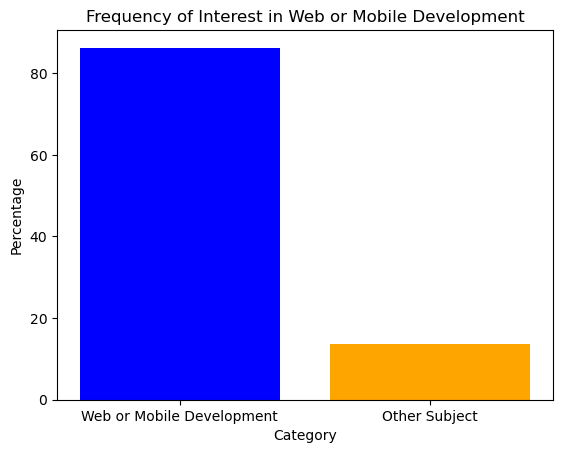

In [123]:
# Plotting the frequency table.
plt.bar(df['Category'], df['Frequency'], color=['blue', 'orange'])
plt.xlabel('Category')
plt.ylabel('Percentage')
plt.title('Frequency of Interest in Web or Mobile Development')
plt.savefig("bar_with_Web or Mobile Development.png")
plt.show()

It turns out that most people in this survey (roughly 86%) are interested in either web or mobile development. These figures offer us a strong reason to consider this sample representative for our population of interest. We want to advertise our courses to people interested in all sorts of programming niches but mostly web and mobile development.

# New Coders - Locations and Densities

Let's begin with finding out where these new coders are located, and what are the densities (how many new coders there are) for each location. This should be a good start for finding out the best two markets to run our ads campaign in.

The data set provides information about the location of each participant at a country level. We can think of each country as an individual market, so we can frame our goal as finding the two best countries to advertise in.

In [124]:
# Isolate the participants that answered what role they'd be interested in.
fcc_good = fcc.dropna(subset=['JobRoleInterest'])

# Calculate the absolute and relative frequencies.
frequency_table = fcc_good['CountryLive'].value_counts().rename('Absolute frequency')
relative_frequency = (fcc_good['CountryLive'].value_counts(normalize=True) * 100).rename('Percentage')

# Combine the absolute and relative frequencies into a single DataFrame.
combined_frequency = pd.concat([frequency_table, relative_frequency], axis=1)

# Sort the DataFrame by the 'Percentage' column in descending order.
sorted_combined_frequency = combined_frequency.sort_values(by='Percentage', ascending=False)

# Display the sorted frequency table.
print(sorted_combined_frequency)

                               Absolute frequency  Percentage
CountryLive                                                  
United States of America                     3125   45.700497
India                                         528    7.721556
United Kingdom                                315    4.606610
Canada                                        260    3.802281
Poland                                        131    1.915765
Brazil                                        129    1.886517
Germany                                       125    1.828020
Australia                                     112    1.637906
Russia                                        102    1.491664
Ukraine                                        89    1.301550
Nigeria                                        84    1.228429
Spain                                          77    1.126060
France                                         75    1.096812
Romania                                        71    1.038315
Netherla

45.70% of our potential customers are located in the United States of America, and this definitely seems like the most interesting market. India has the second customer density, but it's just 7.72%, which is not too far from the United Kingdom (4.60%) or Canada (3.80%).

This is useful information, but we need to go more in depth than this and figure out how much money people are actually willing to spend on learning. Advertising in high-density markets where most people are only willing to learn for free is extremely unlikely to be profitable for us.

# Spending Money for Learning

The `MoneyForLearning` column describes in American dollars the amount of money spent by participants from the moment they started coding until the moment they completed the survey. Our company sells subscriptions at a price of 59 (USD) per month, and for this reason we're interested in finding out how much money each student spends per month.

We'll narrow down our analysis to only four countries: the US, India, the United Kingdom, and Canada. We do this for two reasons:

* These are the countries having the highest frequency in the frequency table above, which means we have a decent amount of data for each.
* Our courses are written in English, and English is an official language in all these four countries. The more people know English, the better our chances to target the right people with our ads.

In [125]:
# Replace 0s with 1s in the 'MonthsProgramming' column to avoid division by 0.
fcc_good['MonthsProgramming'].replace(0, 1, inplace=True)

# Create a new column 'money_per_month' by dividing 'MoneyForLearning' by 'MonthsProgramming'.
fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']

# Calculate the number of NA values in the 'money_per_month' column.
na_count = fcc_good['money_per_month'].isna().sum()

# Display the count of NA values.
print(na_count)

# Print out the first rows of the dataset
fcc_good.head()

675


C:\Users\mzing\AppData\Local\Temp\ipykernel_14032\1448146132.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcc_good['MonthsProgramming'].replace(0, 1, inplace=True)
C:\Users\mzing\AppData\Local\Temp\ipykernel_14032\1448146132.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  fcc_good['money_per_month'] = fcc_good['MoneyForLearning'] / fcc_good['MonthsProgramming']


,AttendedBootcamp,MonthsProgramming,MoneyForLearning,CountryLive,JobRoleInterest,money_per_month
1,0.0,6.0,80.0,United States of America,Full-Stack Web Developer,13.333333
2,0.0,5.0,1000.0,United States of America,"Front-End Web Developer, Back-End Web Develo...",200.000000
3,0.0,5.0,0.0,Brazil,"Front-End Web Developer, Full-Stack Web Deve...",0.000000
4,0.0,24.0,0.0,Portugal,"Full-Stack Web Developer, Information Security...",0.000000
6,0.0,12.0,0.0,United Kingdom,Full-Stack Web Developer,0.000000


In [126]:
# Keep only the rows with non-NAs in the 'money_per_month' column.
fcc_good = fcc_good.dropna(subset=['money_per_month'])

In [127]:
# Remove the rows with NA values in 'CountryLive'.
fcc_good = fcc_good.dropna(subset=['CountryLive'])

In [128]:
# Create a frequency table to check if we still have enough data.
country_freq = fcc_good['CountryLive'].value_counts().head()

# Display the frequency table.
print(country_freq)

CountryLive
United States of America    2933
India                        463
United Kingdom               279
Canada                       240
Poland                       122
Name: count, dtype: int64


# Compute the average value spent per month in each country by a student

In [129]:
# Filter the DataFrame for the specified countries.
filtered_countries = fcc_good[fcc_good['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# Group by 'CountryLive' and calculate the mean of 'money_per_month'.
countries_mean = filtered_countries.groupby('CountryLive')['money_per_month'].mean().reset_index()

# Display the resulting DataFrame.
print(countries_mean)

                CountryLive  money_per_month
0                    Canada       113.510961
1                     India       135.100982
2            United Kingdom        45.534443
3  United States of America       227.997996


# Dealing with Extreme Outliers

We will use box plots to visualize the distribution of the `money_per_month` variable for each country.

In [130]:
# Isolate only the countries of interest.
only_4 = fcc_good[fcc_good['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# Add an index column containing the number of each row.
only_4 = only_4.reset_index()
only_4.rename(columns={'index': 'row_number'}, inplace=True)

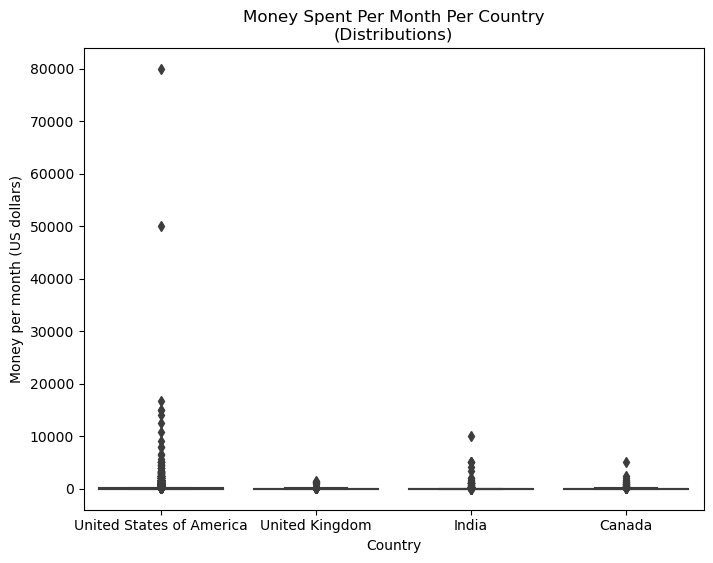

In [131]:
# Box plots to visualize distributions.
plt.figure(figsize=(8, 6))
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)
#only_4.boxplot(column='money_per_month', by='CountryLive', grid=False)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.suptitle("")  # Suppress the default title to match the ggplot2 output
plt.xlabel("Country")
plt.ylabel("Money per month (US dollars)")
plt.savefig("boxplot_with_outliers.png")
plt.show()

It's hard to see on the plot above if there's anything wrong with the data for the United Kingdom, India, or Canada, but we can see immediately that there's something really off for the US: two persons spend each month 50,000 or more for learning. This is not impossible, but it seems extremely unlikely, so we'll remove every value that goes over 20,000 per month.

In [132]:
# Isolate only those participants who spend less than 20,000 per month.
fcc_good = fcc_good[fcc_good['money_per_month'] < 20000]

Now let's recompute the mean values and plot the box plots again.

In [133]:
# Filter the DataFrame for the specified countries.
filtered_countries = fcc_good[fcc_good['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# Group by 'CountryLive' and calculate the mean of 'money_per_month'.
countries_mean = filtered_countries.groupby('CountryLive')['money_per_month'].mean().reset_index()

# Display the resulting DataFrame.
print(countries_mean)

                CountryLive  money_per_month
0                    Canada       113.510961
1                     India       135.100982
2            United Kingdom        45.534443
3  United States of America       183.800110


In [134]:
# Isolate only the countries of interest.
only_4 = fcc_good[fcc_good['CountryLive'].isin(['United States of America', 'India', 'United Kingdom', 'Canada'])]

# Add an index column containing the number of each row.
only_4 = only_4.reset_index()
only_4.rename(columns={'index': 'row_number'}, inplace=True)

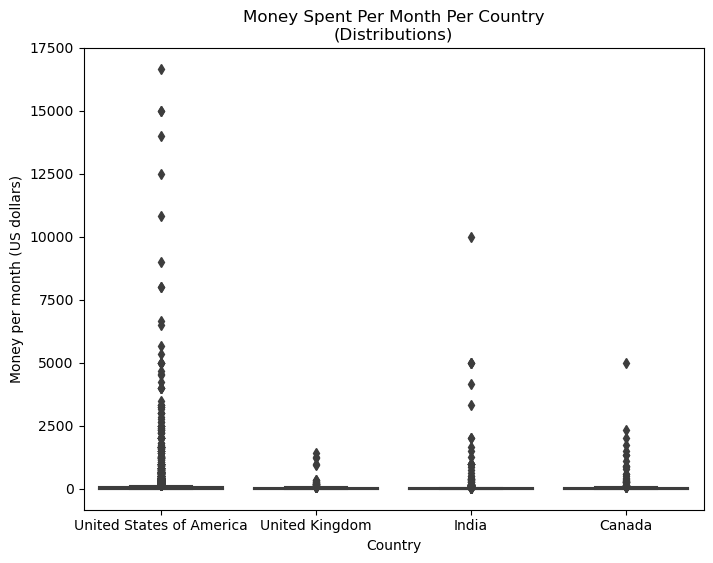

In [135]:
# Box plots to visualize distributions.
plt.figure(figsize=(8, 6))
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)
#only_4.boxplot(column='money_per_month', by='CountryLive', grid=False)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.suptitle("")
plt.xlabel("Country")
plt.ylabel("Money per month (US dollars)")
plt.savefig("boxplot_with_removed_outliers_1.png")
plt.show()

We can see a few extreme outliers for India (values over \$2,500 per month), but it's unclear whether this is good data or not. Maybe these persons attended several bootcamps, which tend to be very expensive. Let's examine these two data points to see if we can find anything relevant.

In [136]:
# Filter for India outliers with money_per_month >= 2500.
india_outliers = only_4[(only_4['CountryLive'] == 'India') & (only_4['money_per_month'] >= 2500)]

# Display the outliers.
print(india_outliers)

      row_number  AttendedBootcamp  MonthsProgramming  MoneyForLearning  \
478         1728               0.0                4.0           20000.0   
480         1755               0.0               15.0           50000.0   
2049        7989               0.0                1.0            5000.0   
2085        8126               0.0                1.0            5000.0   
2919       13398               0.0                2.0           20000.0   
3262       15587               0.0               24.0          100000.0   

     CountryLive                                    JobRoleInterest  \
478        India    User Experience Designer,   Mobile Developer...   
480        India  Information Security, Full-Stack Web Developer...   
2049       India    User Experience Designer, Back-End Web Devel...   
2085       India  Back-End Web Developer, Full-Stack Web Develop...   
2919       India                                   Mobile Developer   
3262       India         Full-Stack Web Develope

It seems that neither participant attended a bootcamp. Overall, it's really hard to figure out from the data whether these persons really spent that much money with learning. The actual question of the survey was _"Aside from university tuition, about how much money have you spent on learning to code so far (in US dollars)?"_, so they might have misunderstood and thought university tuition is included. It seems safer to remove these six rows.

In [137]:
# Remove the outliers for India by filtering out the indices that match those in 'india_outliers'.
only_4 = only_4[~only_4['row_number'].isin(india_outliers['row_number'])]

Looking back at the box plot above, we can also see more extreme outliers for the US (values over \$6,000 per month). Let's examine these participants in more detail.

In [138]:
# Examine the extreme outliers for the US.
us_outliers = only_4[(only_4['CountryLive'] == 'United States of America') & (only_4['money_per_month'] >= 6000)]

# Display the US outliers.
print(us_outliers)

      row_number  AttendedBootcamp  MonthsProgramming  MoneyForLearning  \
196          718               1.0                1.0            8000.0   
346         1222               1.0                2.0           13000.0   
871         3184               1.0                1.0            9000.0   
1055        3930               0.0                6.0           65000.0   
1758        6805               1.0                1.0           15000.0   
1854        7198               0.0                5.0           70000.0   
1933        7505               1.0                3.0           20000.0   
2490        9778               1.0                1.0            8000.0   
3503       16650               0.0               12.0          200000.0   
3601       16997               0.0                1.0           12500.0   
3662       17231               0.0                2.0           30000.0   

                   CountryLive  \
196   United States of America   
346   United States of America 

Out of these 11 extreme outliers, six people attended bootcamps, which justify the large sums of money spent on learning. For the other five, it's hard to figure out from the data where they could have spent that much money on learning. Consequently, we'll remove those rows where participants reported thay they (spend \$6,000 each month), but they have never attended a bootcamp.

Also, the data shows that eight respondents had been programming for no more than three months when they completed the survey. They most likely paid a large sum of money for a bootcamp that was going to last for several months, so the amount of money spent per month is unrealistic and should be significantly lower (because they probably didn't spend anything for the next couple of months after the survey). As a consequence, we'll remove every these eight outliers.

In [139]:
# Remove the respondents who didn't attend a bootcamp and who spend more than $6000.
no_bootcamp = only_4[(only_4['CountryLive'] == 'United States of America') & 
                     (only_4['money_per_month'] >= 6000) &
                     (only_4['AttendedBootcamp'] == 0)]

# Update 'only_4' by removing the 'no_bootcamp' entries.
only_4 = only_4[~only_4['row_number'].isin(no_bootcamp['row_number'])]

In [140]:
# Remove the respondents that had been programming for less than 3 months.
less_than_3_months = only_4[(only_4['CountryLive'] == 'United States of America') & 
                            (only_4['money_per_month'] >= 6000) &
                            (only_4['MonthsProgramming'] <= 3)]

# Update 'only_4' by removing the 'less_than_3_months' entries.
only_4 = only_4[~only_4['row_number'].isin(less_than_3_months['row_number'])]

Looking again at the last box plot above, we can also see an extreme outlier for Canada — a person who spends roughly ($5,000 per month). Let's examine this person in more depth.

In [141]:
# Filter for Canada outliers with money_per_month >= 4500 and MonthsProgramming <= 3.
canada_outliers = only_4[(only_4['CountryLive'] == 'Canada') & 
                         (only_4['money_per_month'] >= 4500) & 
                         (only_4['MonthsProgramming'] <= 3)]

# Display the outliers.
print(canada_outliers)

      row_number  AttendedBootcamp  MonthsProgramming  MoneyForLearning  \
2969       13659               1.0                2.0           10000.0   

     CountryLive                                    JobRoleInterest  \
2969      Canada    Mobile Developer, Full-Stack Web Developer, ...   

      money_per_month  
2969           5000.0  


Here, the situation is similar to some of the US respondents — this participant had been programming for no more than two months when he completed the survey. He seems to have paid a large sum of money in the beginning to enroll in a bootcamp, and then he probably didn't spend anything for the next couple of months after the survey. We'll take the same approach here as for the US and remove this outlier.

In [142]:
# Remove the extreme outliers for Canada by filtering out the indices that match those in 'canada_outliers'.
only_4 = only_4[~only_4['row_number'].isin(canada_outliers['row_number'])]

Let's recompute the mean values and generate the final box plots.

In [143]:
# Group by 'CountryLive' and calculate the mean of 'money_per_month'.
countries_mean = only_4.groupby('CountryLive')['money_per_month'].mean().reset_index()

# Display the resulting DataFrame.
print(countries_mean)

                CountryLive  money_per_month
0                    Canada        93.065400
1                     India        65.758763
2            United Kingdom        45.534443
3  United States of America       142.654608


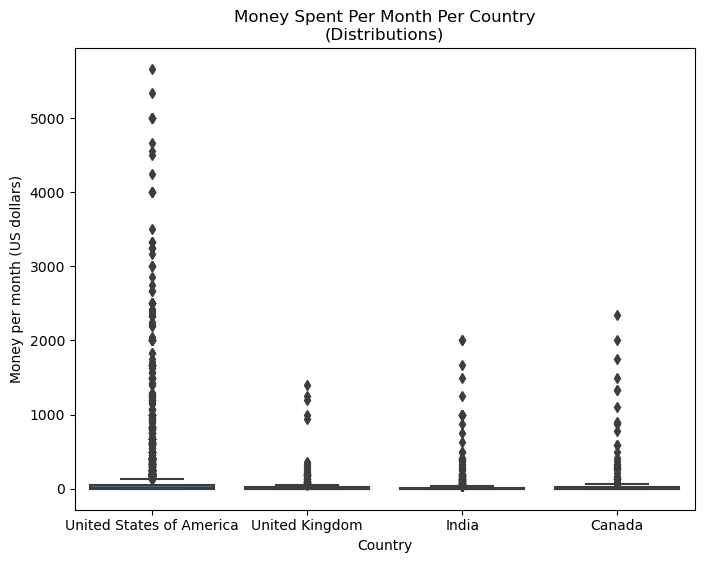

In [144]:
# Create box plots to visualize distributions.
plt.figure(figsize=(8, 6))
sns.boxplot(x='CountryLive', y='money_per_month', data=only_4)
plt.title("Money Spent Per Month Per Country\n(Distributions)")
plt.xlabel("Country")
plt.ylabel("Money per month (US dollars)")
plt.savefig("boxplot_with_removed_outliers_2.png")
plt.show()

# Choosing the Two Best Markets

Obviously, one country we should advertise in is the US. Lots of new coders live there and they are willing to pay a good amount of money each month roughly 143 (USD).

We sell subscriptions at a price of 59 (USD) per month, and Canada seems to be the best second choice because people there are willing to pay roughly 93 (USD) per month, compared to India 66 (USD) per month and the United Kingdom 45 (USD) per month.

The data suggests strongly that we shouldn't advertise in the UK, but let's take a second look at India before deciding to choose Canada as our second best choice:

* 59 (USD) per month doesn't seem like an expensive sum for people in India since they spend on average 66 (USD) each month.
* We have almost twice as more potential customers in India than we have in Canada

In [112]:
# Calculate the relative frequency for the 'CountryLive' column.
relative_freq = only_4['CountryLive'].value_counts(normalize=True) * 100

# Calculate the absolute frequency for the 'CountryLive' column.
absolute_freq = only_4['CountryLive'].value_counts()

# Create a DataFrame for the relative frequency table and display the top entries.
relative_freq_table = pd.DataFrame(relative_freq).reset_index()
relative_freq_table.columns = ['CountryLive', 'Relative Frequency']
print(relative_freq_table.head())

                CountryLive  Relative Frequency
0  United States of America           74.967908
1                     India           11.732991
2            United Kingdom            7.163030
3                    Canada            6.136072


In [113]:
# Create a DataFrame for the absolute frequency table and display the top entries.
absolute_freq_table = pd.DataFrame(absolute_freq).reset_index()
absolute_freq_table.columns = ['CountryLive', 'Absolute Frequency']
print(absolute_freq_table.head())

                CountryLive  Absolute Frequency
0  United States of America                2920
1                     India                 457
2            United Kingdom                 279
3                    Canada                 239


# Conclusion

So it's not crystal clear what to choose between Canada and India. Although it seems more tempting to choose Canada, there are good chances that India might actually be a better choice because of the large number of potential customers.

At this point, it seems that we have several options:

1. Advertise in the US, India, and Canada by splitting the advertisement budget in various combinations:
    - 60% for the US, 25% for India, 15% for Canada.
    - 50% for the US, 30% for India, 20% for Canada; etc.

2. Advertise only in the US and India, or the US and Canada. Again, it makes sense to split the advertisement budget unequally. For instance:
    - 70% for the US, and 30% for India.
    - 65% for the US, and 35% for Canada; etc.

3. Advertise only in the US.